In [74]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support, accuracy_score  
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
import itertools
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
np.set_printoptions(threshold=np.nan)

#data is veel groter, want alle alcohol
pdata = pd.read_csv("../Data/preprocessed_conditiondata_vars.csv")
# pdata = pdata.drop(["Unnamed: 0"], axis=1)
pdata['Conditie'] = pdata['Conditie'].map({'norm': 0,  'bril': 1})
# pdata['Alcohol'] = pdata['Alcohol'].map({'Sober': 0,  'Light': 1, 'Tipsy': 2, 'Drunk': 3})
# pdata = pdata[pdata.Alcohol == 0]
# pdata

In [75]:
#Splits data into training and validation according to specified ratio
def validation_split(data, ratio):
    sidlist = data['SubjectID'].unique()
    gdata = [data[data['SubjectID']==sid] for sid in sidlist]
    np.random.shuffle(gdata)
    N = len(gdata)
    training = gdata[:int(ratio*N)]
    validation = gdata[(int(ratio*N)):]
    return training,validation

# Converts the arrays in a list to one flattend dataframe
def flatten(data, variable_list):
    return pd.DataFrame(np.vstack(data), columns=variable_list)

def get_split_data(originaldata, variable_list, ratio):
    data = originaldata[variable_list]
    training,validation = validation_split(data, 0.7)
    training = flatten(training, variable_list)
    validation = flatten(validation, variable_list)

    X_train = training.drop(['Conditie', 'SubjectID'], axis=1)
    y_train = training['Conditie']
    X_train = X_train.astype(float)
    y_train = y_train.astype(int)
    
    X_test = validation.drop(['Conditie', 'SubjectID'], axis=1)
    y_test = validation['Conditie']
    X_test = X_test.astype(float)
    y_test = y_test.astype(int)
    return X_train, X_test, y_train, y_test

collist =  ['SubjectID', 'Conditie', 'AverageStepLength', 'mad_SegmentData']
X_train, X_test, y_train, y_test = get_split_data(pdata, collist , 0.7)


X_train = np.array(X_train, dtype=float)
y_train = np.array(y_train, dtype=int)

X_test = np.array(X_test, dtype=float)
y_test = np.array(y_test, dtype=int)



Prediction accuracy for the normal test dataset with PCA
84.38%


Prediction accuracy for the standardized test dataset with PCA
82.59%


PC 1 without scaling:
 [ 0.99628697 -0.0860946 ]

PC 1 with scaling:
 [-0.70710678  0.70710678]


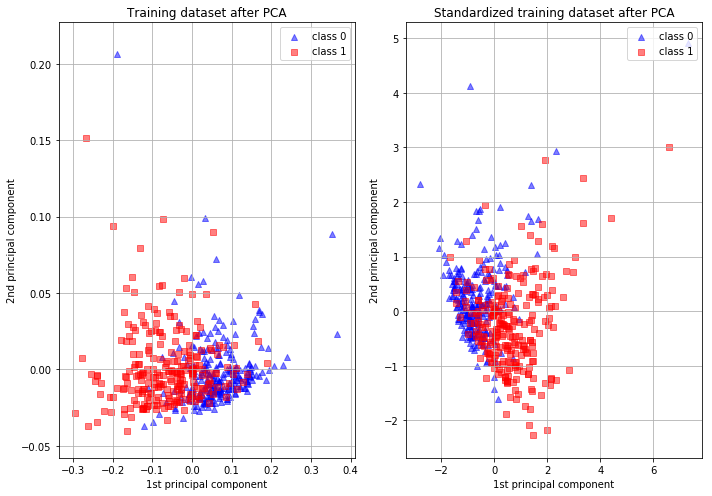

In [63]:
from __future__ import print_function
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline

RANDOM_STATE = 42
FIG_SIZE = (10, 7)

# Fit to data and predict using pipelined GNB and PCA.
unscaled_clf = make_pipeline(PCA(n_components=2), GaussianNB())
unscaled_clf.fit(X_train, y_train)
pred_test = unscaled_clf.predict(X_test)

# Fit to data and predict using pipelined scaling, GNB and PCA.
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB())
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)

# Show prediction accuracies in scaled and unscaled data.
print('\nPrediction accuracy for the normal test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test)))

print('\nPrediction accuracy for the standardized test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_std)))

# Extract PCA from pipeline
pca = unscaled_clf.named_steps['pca']
pca_std = std_clf.named_steps['pca']

# Show first principal components
print('\nPC 1 without scaling:\n', pca.components_[0])
print('\nPC 1 with scaling:\n', pca_std.components_[0])

# Use PCA without and with scale on X_train data for visualization.
X_train_transformed = pca.transform(X_train)
scaler = std_clf.named_steps['standardscaler']
X_train_std_transformed = pca_std.transform(scaler.transform(X_train))

# visualize standardized vs. untouched dataset with PCA performed
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=FIG_SIZE)


for l, c, m in zip(range(0, 3), ('blue', 'red'), ('^', 's', 'o')):
    ax1.scatter(X_train_transformed[y_train == l, 0],
                X_train_transformed[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

for l, c, m in zip(range(0, 3), ('blue', 'red'), ('^', 's', 'o')):
    ax2.scatter(X_train_std_transformed[y_train == l, 0],
                X_train_std_transformed[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

ax1.set_title('Training dataset after PCA')
ax2.set_title('Standardized training dataset after PCA')

for ax in (ax1, ax2):
    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')
    ax.grid()

plt.tight_layout()

plt.show()

In [64]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Make an instance of the Model
pca = PCA(n_components=2)
pca.fit(X_train)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.8258928571428571


Bayes classifier accuracy 0.8258928571428571
Confusion matrix, without normalization
[[97 15]
 [24 88]]


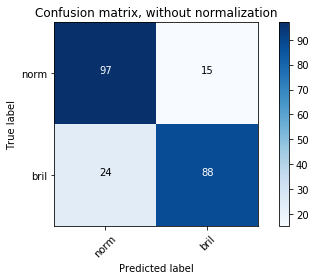

In [65]:
print('Bayes classifier accuracy', accuracy_score(y_test, y_pred))

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


plt.figure()
plot_confusion_matrix(confusion_matrix(y_test, y_pred), classes=['norm', 'bril'],
                      title='Confusion matrix, without normalization')

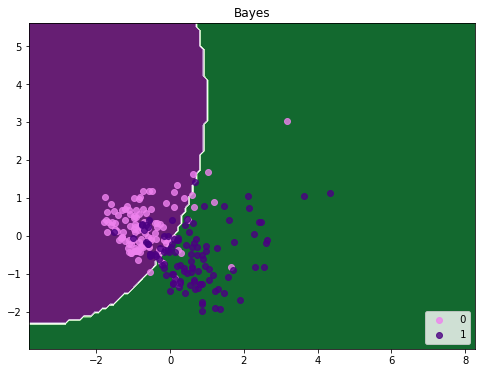

In [66]:


#Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
padding = 0.1
resolution = 0.1

colors = {0: 'violet', 1: 'indigo'}
x_min, x_max = X_train[:, 0].min(), X_train[:, 0].max()
y_min, y_max = X_train[:, 1].min(), X_train[:, 1].max()
x_range = x_max - x_min
y_range = y_max - y_min
x_min -= x_range * padding
y_min -= y_range * padding
x_max += x_range * padding
y_max += y_range * padding

# Get decision boundaries from model
xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                     np.arange(y_min, y_max, resolution))

Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour map
plt.contourf(xx, yy, Z, cmap=plt.cm.PRGn)
plt.axis('tight')

# Plot your testing points as wel
for label in np.unique(y_test):
    indices = np.where(y_test == label)
    plt.scatter(X_test[indices, 0], X_test[indices, 1], c=colors[label], alpha=0.8, 
                label=' {}'.format(label))

plt.legend(loc='lower right')
plt.title('Bayes')
plt.show()

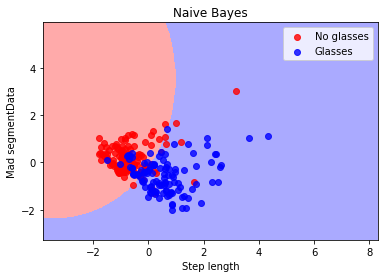

In [67]:
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

h = .02  # step size in the mesh
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
colors = {0: 'red', 1: 'blue'}
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
# plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold)

score = gnb.score(X_test, y_test)
# plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, alpha=0.5, cmap=cmap_bold)

for label in np.unique(y_test):
    indices = np.where(y_test == label)
    plt.scatter(X_test[indices, 0], X_test[indices, 1], c=colors[label], alpha=0.8, 
                label=' {}'.format(label))

colors = ['red', 'blue']
labels = ['No glasses', 'Glasses']
plt.legend(labels)
plt.title('Naive Bayes')
plt.xlabel('Step length')
plt.ylabel('Mad segmentData')
plt.savefig('Naive Bayes')
plt.show()

In [83]:
def make_decisions(originaldata, variable_list):
    data = originaldata[variable_list]
    training,validation = validation_split(data, 0.7)
    training = flatten(training, variable_list)
    validation = flatten(validation, variable_list)

    X_train = training.drop(['Conditie', 'SubjectID'], axis=1)
    y_train = training['Conditie']
    X_train = X_train.astype(float)
    y_train = y_train.astype(int)
    
    X_test = validation.drop(['Conditie', 'SubjectID'], axis=1)
    y_test = validation['Conditie']
    X_test = X_test.astype(float)
    y_test = y_test.astype(int)
    
    scaler = StandardScaler()

    # Fit on training set only.
    scaler.fit(X_train)

    # Apply transform to both the training set and the test set.
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    # Make an instance of the Model
    pca = PCA(n_components=2)
    pca.fit(X_train)

    X_train = pca.transform(X_train)
    X_test = pca.transform(X_test)

    gnb = GaussianNB()
    gnb.fit(X_train, y_train)

    y_pred = gnb.predict(X_test)

    return accuracy_score(y_test, y_pred)



make_decisions(pdata, collist)

0.7678571428571429

In [84]:
print('Accuracy Scores for different variables (mean of 100 loops)')
print('BMI, Age, mad_SegmentData:', np.mean([make_decisions(pdata, ['SubjectID', 'Conditie', 'BMI', 'Age', 'mad_SegmentData']) for i in range(100)]))
print('Height, Age, AverageStepLength:', np.mean([make_decisions(pdata, ['SubjectID', 'Conditie', 'Height', 'Age', 'AverageStepLength']) for i in range(100)]))
print('BMI, Age, mad_SegmentData, AverageStepLength:', np.mean([make_decisions(pdata, ['SubjectID', 'Conditie', 'BMI', 'Age', 'AverageStepLength', 'mad_SegmentData']) for i in range(100)]))
print('BMI, mad_SegmentData, AverageStepLength:', np.mean([make_decisions(pdata, ['SubjectID', 'Conditie', 'BMI', 'AverageStepLength', 'mad_SegmentData']) for i in range(100)]))
print('Height, mad_SegmentData, AverageStepLength, Velocity:', np.mean([make_decisions(pdata, ['SubjectID', 'Conditie', 'Height', 'mad_SegmentData', 'AverageStepLength', 'Velocity']) for i in range(100)]))
print('std_SegmentData, mad_SegmentData, AverageStepLength, Velocity:', np.mean([make_decisions(pdata, ['SubjectID', 'Conditie', 'std_SegmentData', 'mad_SegmentData', 'AverageStepLength', 'Velocity']) for i in range(100)]))
print('std_SegmentData, mad_SegmentData, AverageStepLength:', np.mean([make_decisions(pdata, ['SubjectID', 'Conditie', 'std_SegmentData', 'mad_SegmentData', 'AverageStepLength']) for i in range(100)]))
print('Velocity, mad_SegmentData, AverageStepLength:', np.mean([make_decisions(pdata, ['SubjectID', 'Conditie', 'Velocity', 'mad_SegmentData', 'AverageStepLength']) for i in range(100)]))
print('AverageStepLength, Velocity:', np.mean([make_decisions(pdata, ['SubjectID', 'Conditie','AverageStepLength', 'Velocity']) for i in range(100)]))
print('mad_SegmentData, Velocity:', np.mean([make_decisions(pdata, ['SubjectID', 'Conditie','mad_SegmentData', 'Velocity']) for i in range(100)]))
print('mad_SegmentData, AverageStepLength:', np.mean([make_decisions(pdata, ['SubjectID', 'Conditie', 'mad_SegmentData', 'AverageStepLength']) for i in range(100)]))
print('mad_SegmentData, AverageStepLength, 6,0,01:', np.mean([make_decisions(pdata, ['SubjectID', 'Conditie','mad_SegmentData', 'AverageStepLength']) for i in range(100)]))


Accuracy Scores for different variables (mean of 100 loops)
BMI, Age, mad_SegmentData: 0.6045535714285715
Height, Age, AverageStepLength: 0.706517857142857
BMI, Age, mad_SegmentData, AverageStepLength: 0.7694196428571429
BMI, mad_SegmentData, AverageStepLength: 0.7757589285714286
Height, mad_SegmentData, AverageStepLength, Velocity: 0.8100892857142857
std_SegmentData, mad_SegmentData, AverageStepLength, Velocity: 0.8131249999999999
std_SegmentData, mad_SegmentData, AverageStepLength: 0.8150446428571427
Velocity, mad_SegmentData, AverageStepLength: 0.8245089285714284
AverageStepLength, Velocity: 0.8182142857142858
mad_SegmentData, Velocity: 0.7683482142857142
mad_SegmentData, AverageStepLength: 0.8153125000000001
mad_SegmentData, AverageStepLength, 6,0,01: 0.8152678571428571


In [90]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

def make_decisions(originaldata, variable_list):
    data = originaldata[variable_list]
    training,validation = validation_split(data, 0.7)
    training = flatten(training, variable_list)
    validation = flatten(validation, variable_list)

    X_train = training.drop(['Conditie', 'SubjectID'], axis=1)
    y_train = training['Conditie']
    X_train = X_train.astype(float)
    y_train = y_train.astype(int)
    
    X_test = validation.drop(['Conditie', 'SubjectID'], axis=1)
    y_test = validation['Conditie']
    X_test = X_test.astype(float)
    y_test = y_test.astype(int)
    
    scaler = StandardScaler()

    # Fit on training set only.
    scaler.fit(X_train)

    # Apply transform to both the training set and the test set.
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    lda = LDA(n_components=1)  
    X_train = lda.fit_transform(X_train, y_train)  
    X_test = lda.transform(X_test)  

    gnb = GaussianNB()
    gnb.fit(X_train, y_train)

    y_pred = gnb.predict(X_test)

    return accuracy_score(y_test, y_pred)



make_decisions(pdata, collist)

0.8214285714285714

In [91]:
print('Accuracy Scores for different variables (mean of 100 loops)')
print('BMI, Age, mad_SegmentData:', np.mean([make_decisions(pdata, ['SubjectID', 'Conditie', 'BMI', 'Age', 'mad_SegmentData']) for i in range(100)]))
print('Height, Age, AverageStepLength:', np.mean([make_decisions(pdata, ['SubjectID', 'Conditie', 'Height', 'Age', 'AverageStepLength']) for i in range(100)]))
print('BMI, Age, mad_SegmentData, AverageStepLength:', np.mean([make_decisions(pdata, ['SubjectID', 'Conditie', 'BMI', 'Age', 'AverageStepLength', 'mad_SegmentData']) for i in range(100)]))
print('BMI, mad_SegmentData, AverageStepLength:', np.mean([make_decisions(pdata, ['SubjectID', 'Conditie', 'BMI', 'AverageStepLength', 'mad_SegmentData']) for i in range(100)]))
print('Height, mad_SegmentData, AverageStepLength, Velocity:', np.mean([make_decisions(pdata, ['SubjectID', 'Conditie', 'Height', 'mad_SegmentData', 'AverageStepLength', 'Velocity']) for i in range(100)]))
print('std_SegmentData, mad_SegmentData, AverageStepLength, Velocity:', np.mean([make_decisions(pdata, ['SubjectID', 'Conditie', 'std_SegmentData', 'mad_SegmentData', 'AverageStepLength', 'Velocity']) for i in range(100)]))
print('std_SegmentData, mad_SegmentData, AverageStepLength:', np.mean([make_decisions(pdata, ['SubjectID', 'Conditie', 'std_SegmentData', 'mad_SegmentData', 'AverageStepLength']) for i in range(100)]))
print('Velocity, mad_SegmentData, AverageStepLength:', np.mean([make_decisions(pdata, ['SubjectID', 'Conditie', 'Velocity', 'mad_SegmentData', 'AverageStepLength']) for i in range(100)]))
print('AverageStepLength, Velocity:', np.mean([make_decisions(pdata, ['SubjectID', 'Conditie','AverageStepLength', 'Velocity']) for i in range(100)]))
print('mad_SegmentData, Velocity:', np.mean([make_decisions(pdata, ['SubjectID', 'Conditie','mad_SegmentData', 'Velocity']) for i in range(100)]))
print('mad_SegmentData, AverageStepLength:', np.mean([make_decisions(pdata, ['SubjectID', 'Conditie', 'mad_SegmentData', 'AverageStepLength']) for i in range(100)]))
print('mad_SegmentData, AverageStepLength, 6,0,01:', np.mean([make_decisions(pdata, ['SubjectID', 'Conditie','mad_SegmentData', 'AverageStepLength']) for i in range(100)]))


Accuracy Scores for different variables (mean of 100 loops)
BMI, Age, mad_SegmentData: 0.6116964285714286
Height, Age, AverageStepLength: 0.8345982142857145
BMI, Age, mad_SegmentData, AverageStepLength: 0.8230803571428571
BMI, mad_SegmentData, AverageStepLength: 0.8166071428571428
Height, mad_SegmentData, AverageStepLength, Velocity: 0.8360714285714285
std_SegmentData, mad_SegmentData, AverageStepLength, Velocity: 0.8316517857142857
std_SegmentData, mad_SegmentData, AverageStepLength: 0.8228125
Velocity, mad_SegmentData, AverageStepLength: 0.8258928571428573
AverageStepLength, Velocity: 0.8245982142857141
mad_SegmentData, Velocity: 0.8005803571428571
mad_SegmentData, AverageStepLength: 0.8272767857142859
mad_SegmentData, AverageStepLength, 6,0,01: 0.8269196428571429
